# Assignment 1

#### Importing Libraries

In [142]:
import numpy as np
import tensorflow as tf
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import History 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1: A Detailed View to MNIST Classification

1. Train a fully-connected net for MNIST classification (sorry, no CNN please, yet). It should be with 5 hidden layers each of which is with 1024 hidden units. Feel free to use whatever techniques you learned in class. You should be able to get the test accuracy above 98%.


#### Downloading the data

In [81]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reshaping the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# converting labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

###### Model architechture

In [84]:
# define the keras model

model = Sequential()
model.add(Dense(1024, input_dim = 784))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=60, batch_size=50)

Epoch 1/60
1200/1200 [==============================] - 9s 7ms/step - loss: 0.8771 - accuracy: 0.9164
Epoch 2/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1518 - accuracy: 0.9590
Epoch 3/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1223 - accuracy: 0.9667
Epoch 4/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1098 - accuracy: 0.9707
Epoch 5/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1129 - accuracy: 0.9723
Epoch 6/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1013 - accuracy: 0.9749
Epoch 7/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0982 - accuracy: 0.9773
Epoch 8/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0912 - accuracy: 0.9796
Epoch 9/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0678 - accuracy: 0.9848
Epoch 10/60
1200/1200 [==============================] - 8s 6ms/step - loss: 0.068

###### Accuracy in Test set

In [87]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test )
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.1897 - accuracy: 0.9782
Accuracy: 97.82


#### The Accuracy kept on varying between 97.5-98.5%. In the last run the accuracy was at 97.82%

3. Once you’re done with training, as a starter, do a feedforward step on your test samples, a thousand of them. Capture the output of the softmax layer, which will be a 10-dim probability vector per sample. In other words, each output dimension has 1,000 predictions correspond- ing to the 1,000 examples. For each 10-d output vector, find the dim with the maximum probability (which will eventually decide the class label). Plot the input image associated with that in a grid of subplots. For example, you can create a 10 × 10 grid of subplots, whose first row plots first ten input images that produced the highest probabilities for the first dim (which corresponds to “0”). Eventually, if your classification was near perfect, you’ll see ten 0’s in the first row, ten 1’s in the second, and so on.

In [92]:
# taking 1000 samples
x_test_1000 = x_test[:1000]
y_test_1000 = y_test[:1000]

In [94]:
# predicting on 1000 samples
predict = model.predict(x_test_1000)

In [95]:
# storing the index, max probablity value and argmax

def intermediate_mat(mat):
  result_mat = []
  for j in range(mat.shape[0]):
    result_mat.append([j,max(mat[j]),np.argmax(mat[j])])
  return  np.array(result_mat)

result_mat = intermediate_mat(predict)

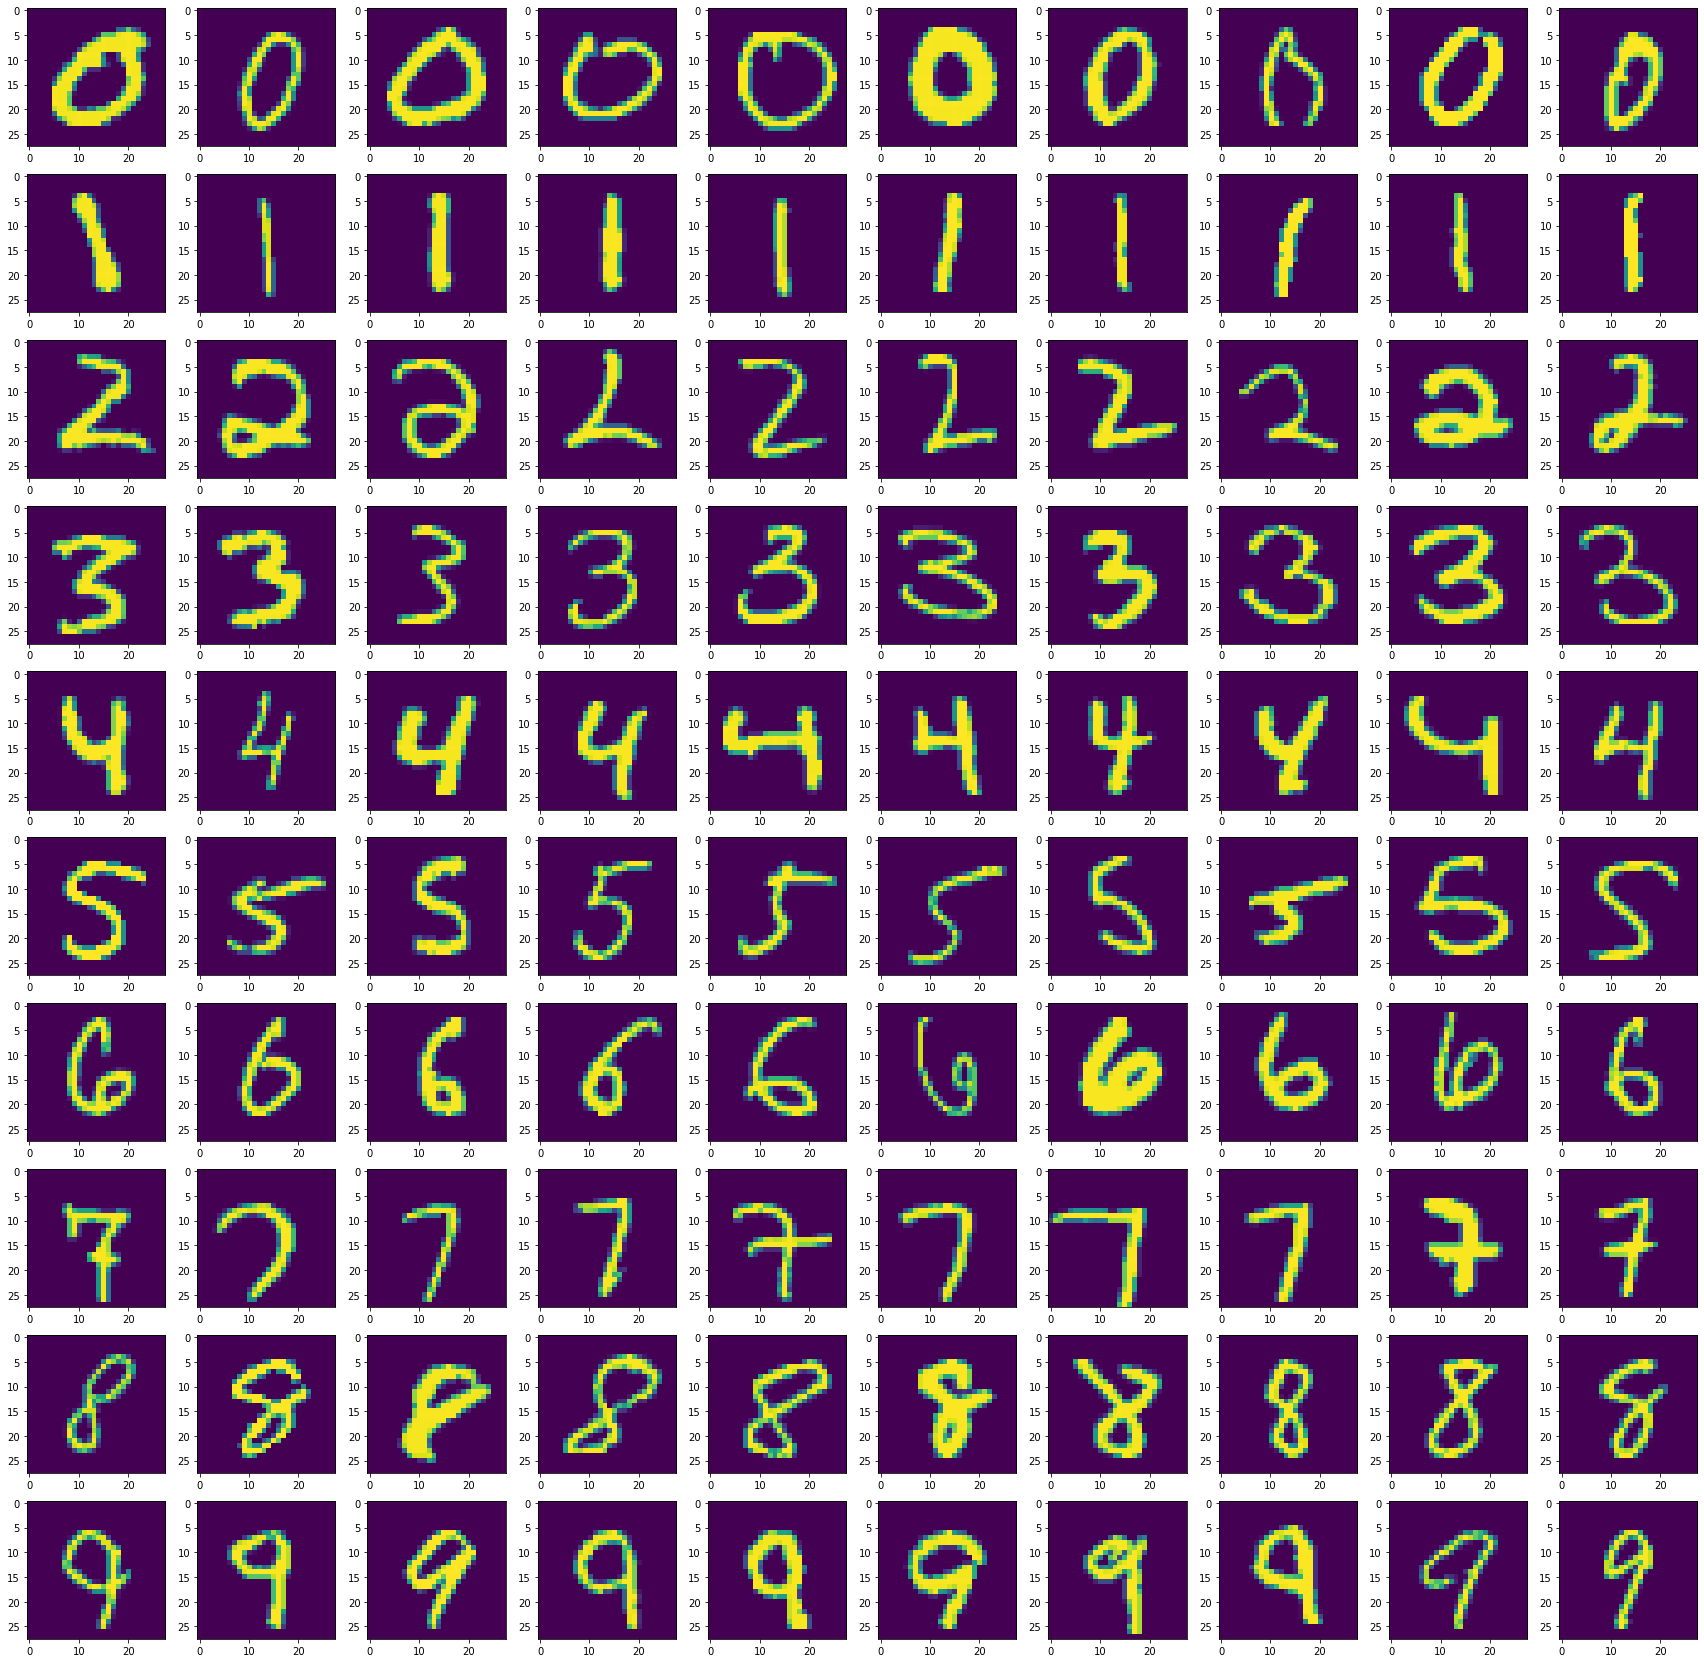

In [96]:
# plotting the top probablities value of each label

fig, ax = plt.subplots(10,10,figsize=(30,30))
for i in range(10):
  result_mat1 = result_mat[result_mat[:,2] == i]
  result_mat1 = result_mat1[result_mat1[:,1].argsort()][::-1]
  result_mat1 = result_mat1[0:10] 
  for j in range(result_mat1.shape[0]):
    ax[i][j].imshow(x_test_1000[int(result_mat1[j][0])].reshape(28,28), cmap='viridis')


#### Each row has highest probablities of the label from 1-9 image. In the image we can see the digits are classified correctly

4. Repeat the procedure in Problem 1.3 for your second to the last layer output. This time, you should have 1024-dim vector per sample. Choose 10 random dimensions of interest and repeat the procedure in 1.3 as if the 10 out of 1024 dimensions are your output vectors. Note that there can be some dimensions that are with less than 10 images associated, because they are not popular. In your 10 × 10 grid, now there must be some rows that are not with enough number of images or even an empty rows. Explain your observation compared with the results from 1.3. What can you see? What would have been the ideal situation for this second-to-the-last layer? Feel free to investigate the other layers if you want, but I wouldn’t care because we have a better way.

In [101]:
# Extracting second to last layer output

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("dense_64").output)

intermediate_output = intermediate_layer_model.predict(x_test_1000)

In [102]:
# Extracting 10 random columns

from random import randrange
b = [randrange(1024) for i in range(10)]
intermediate_output1 = intermediate_output[:,b]

In [103]:
result_mat_10 = intermediate_mat(intermediate_output1)

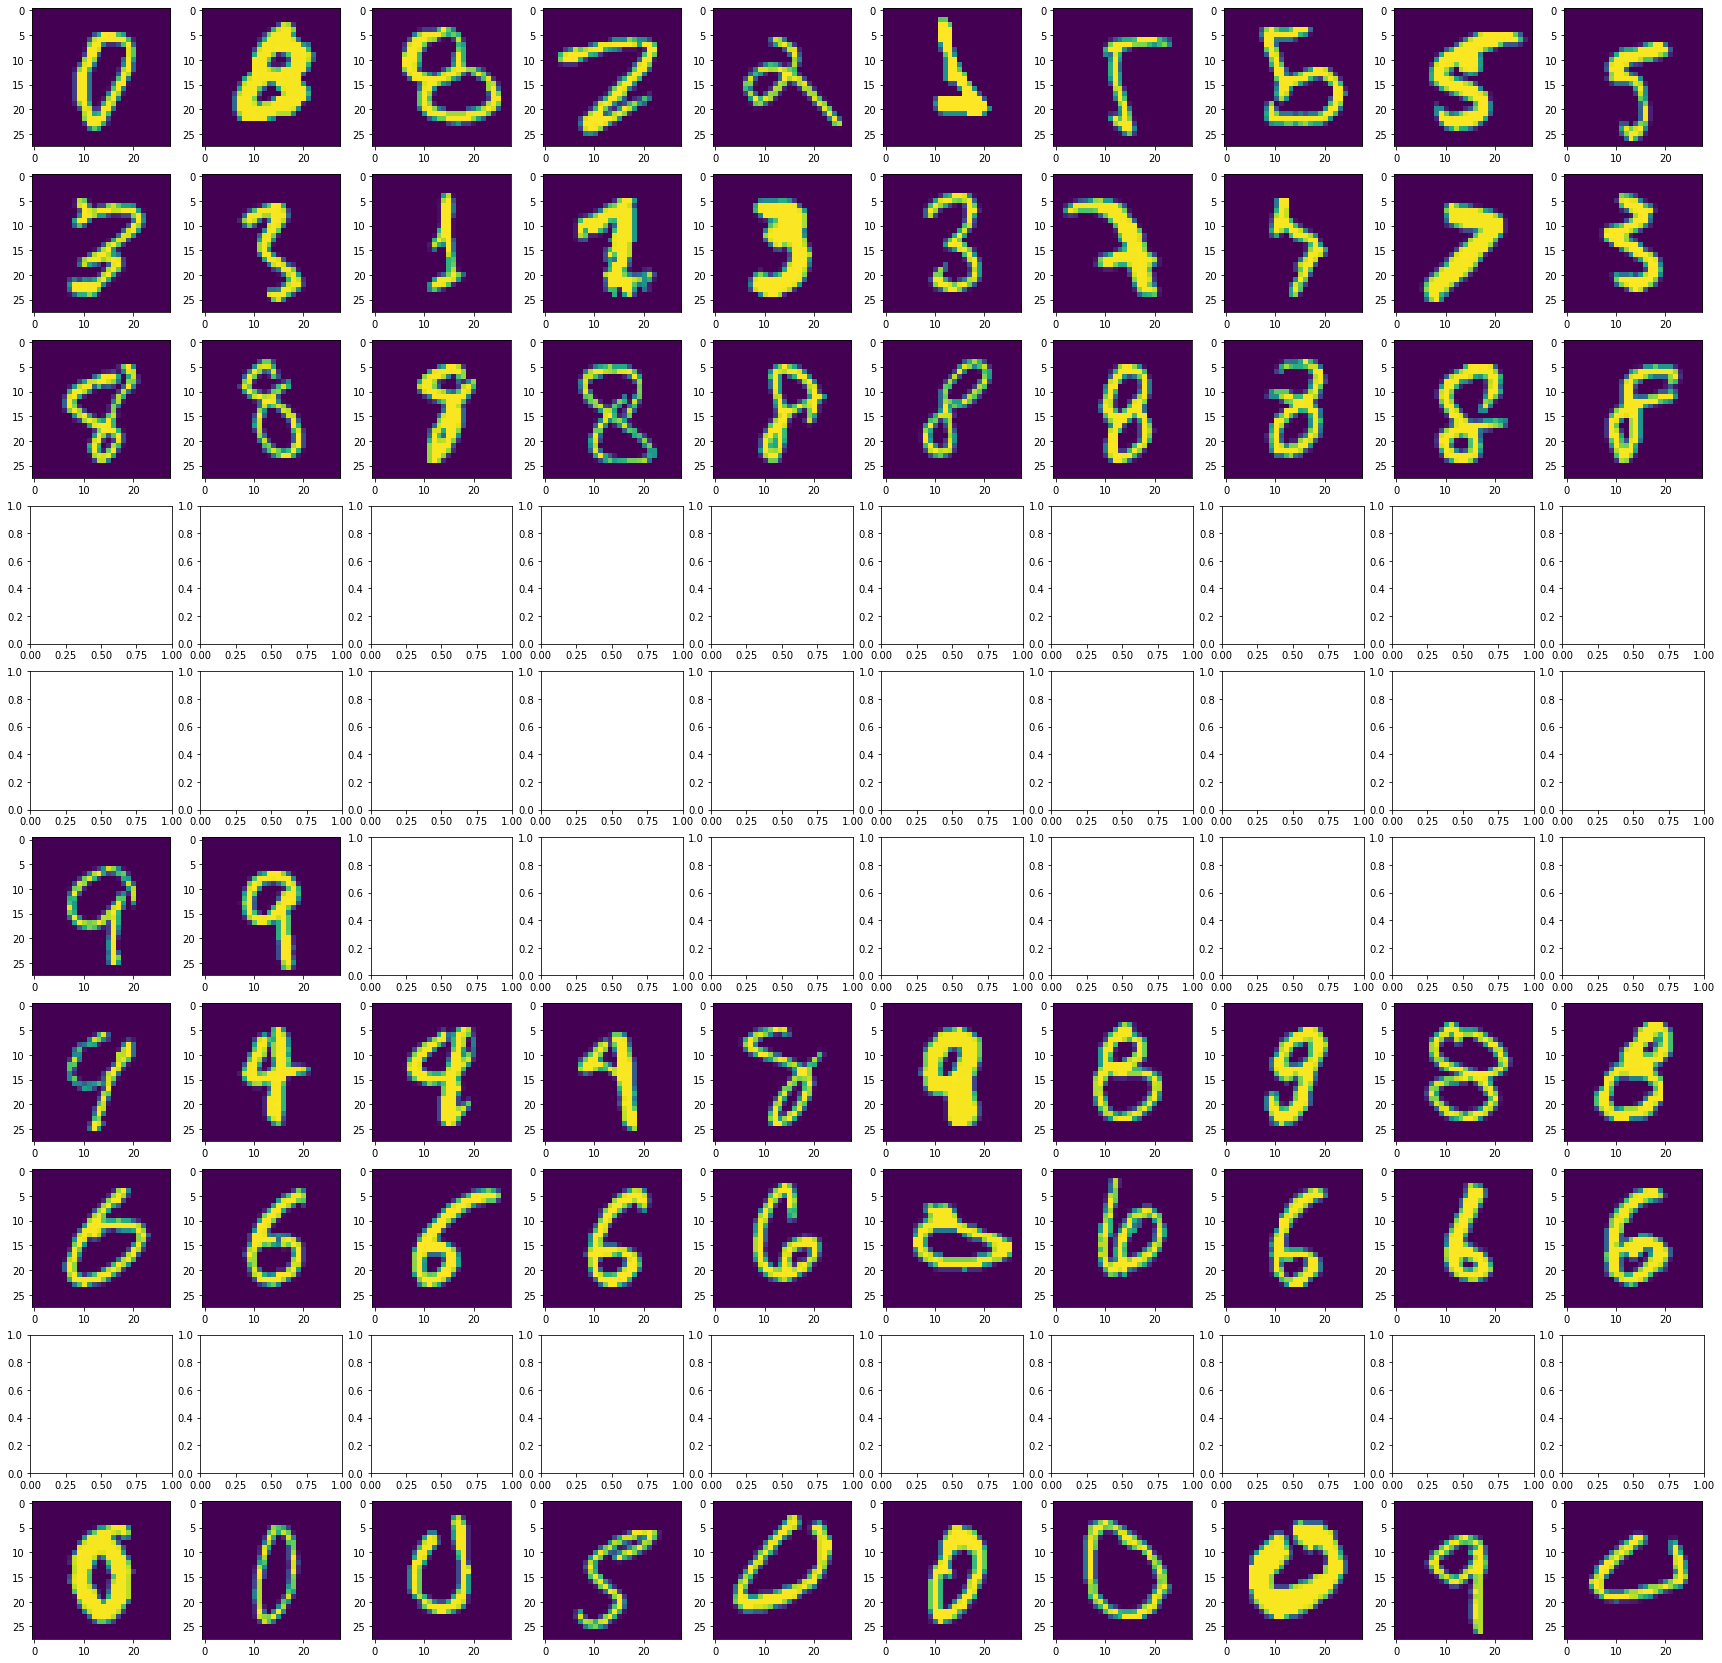

In [104]:
# Plotting

fig, ax = plt.subplots(10,10,figsize=(30,30))
for i in range(10):
  result_mat10_1 = result_mat_10[result_mat_10[:,2] == i]
  result_mat10_1 = result_mat10_1[result_mat10_1[:,1].argsort()][::-1]
  result_mat10_1 = result_mat10_1[0:10] 
  for j in range(result_mat10_1.shape[0]):
    ax[i][j].imshow(x_test_1000[int(result_mat10_1[j][0])].reshape(28,28), cmap='viridis')


#### When we randomly select 10 columns from 1024 columns from the second to last layer, we can see some of the columns are able to capture the features of some of the digit. For example, the last row of the 10*10 grid shows it is capturing the feature which are round, similarly, in the third last row too. 

#### Some of the images are blank because those columns are not capturing any pattern for the digits

#### Initially I took 10 columns after the ReLU activation function in applied to dense layer but due to many of the columns having negative weights only one or two rows of images were showing up as ReLU was converting those columns to zero. I took the output of dense and then plotted these images

#### The ideal situtaion of second to last layer should be when the most of data can be seperable based on the label it belongs



6. First, take a thousand test samples from your MNIST dataset. Apply tSNE and PCA on the flattend 784-dim pixels. Now you have 2 × 1000 (or 1000 × 2 if you transposed the data) matrix from each of the dim reduction algorithms. Scatter plot the data samples. USE THE LABELS OF THE DATA SAMPLES SO THAT EACH SET OF SAMPLES FROM THE SAME CLASS ARE REPRESENTED WITH THE SAME COLOR. OVERLAY THE CLASS LABEL ON TOP OF THE MEAN OF THE CLASS. By doing so, you can examine if your data is easy to classify or not. Do you think this raw image samples are easy to classify? For your information I share my scatter plot of the first two classes in Figure 1. It looks easy because there are only two classes, but with all 10 classes the situation will be different. Your plot should be similar to this but with all 10 classes.

In [109]:
# Extracting the label
label = np.argmax(y_test_1000, axis = 1)


##### PCA

Text(0, 0.5, 'PCA2')

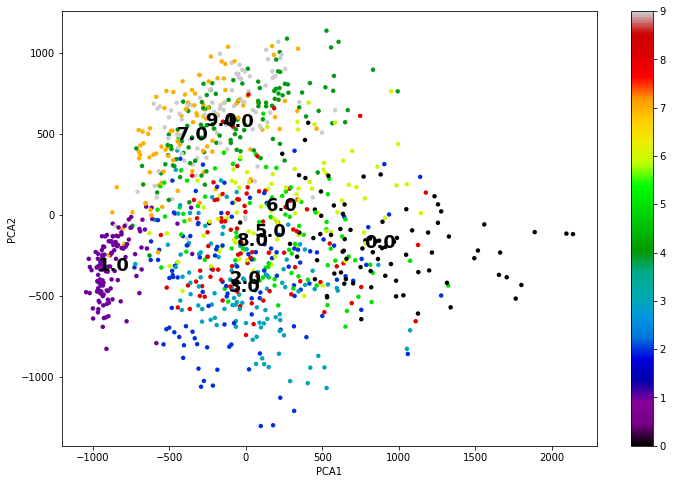

In [ ]:
pca = PCA(n_components=2)
pca.fit(x_train)
pca_train = pca.transform(x_test_1000)

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
centroid_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(centroid_vals[i,0]), 
                 (centroid_vals[i,1],centroid_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')

plt.colorbar()
plt.clim(0,9)

plt.xlabel("PCA1")
plt.ylabel("PCA2")

###### Tsne

Text(0, 0.5, 'TSNE 2')

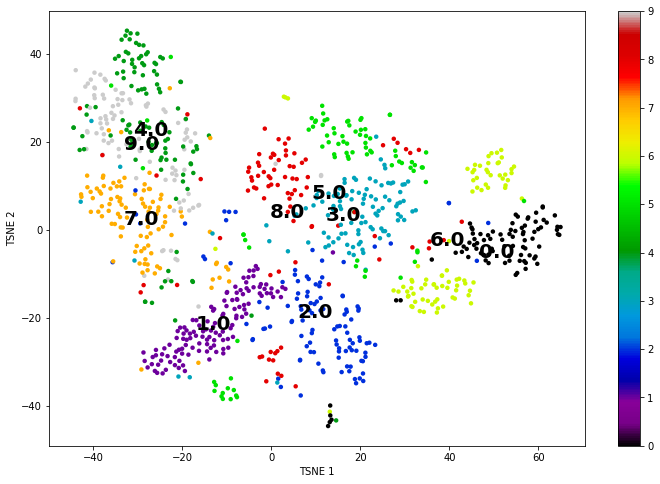

In [ ]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(x_test_1000)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
centroid_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(centroid_vals[i,0]), 
                 (centroid_vals[i,1],centroid_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

#### Seeing the results of TSNE on the input data we can say that few of the label like 7,1,2 would be comparitively easy to classify but the label (3,5,8), (6,0), (4,9) have lot of intersecting data points. So it would be hard to classify from the input data

#### PCA results are not great. Many of the data points in the labels are intersecting

7. Do a feedforward using your classifier. Capture the output of your first hidden layer, which will give you 1024 × 1000 matrix. What that means is that you transformed your input data into a 1024-dim space. You may hope that this makes your classification easier. Check it out by doing tSNE and PCA on this matrix, which will once again give you 2 × 1000 matrix. Scatter plot and check out if this layer gives you a better representation in terms of classification

8. Repeat this procedure for all your layers including the last one. Explain your observation.



###### First hidden layer

In [125]:
first_hidden_layer = Model(inputs=model.input,
                                 outputs=model.get_layer("activation").output)
first_hidden_layer_output = first_hidden_layer.predict(x_test_1000)

Text(0, 0.5, 'TSNE 2')

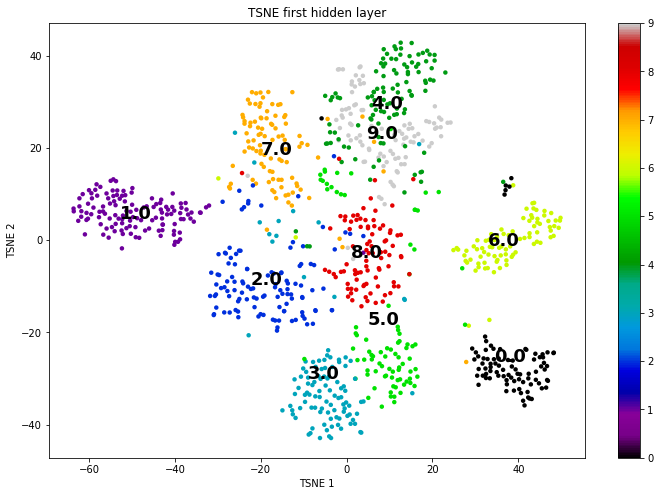

In [128]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(first_hidden_layer_output)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
plt.title("TSNE first hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Text(0, 0.5, 'PCA2')

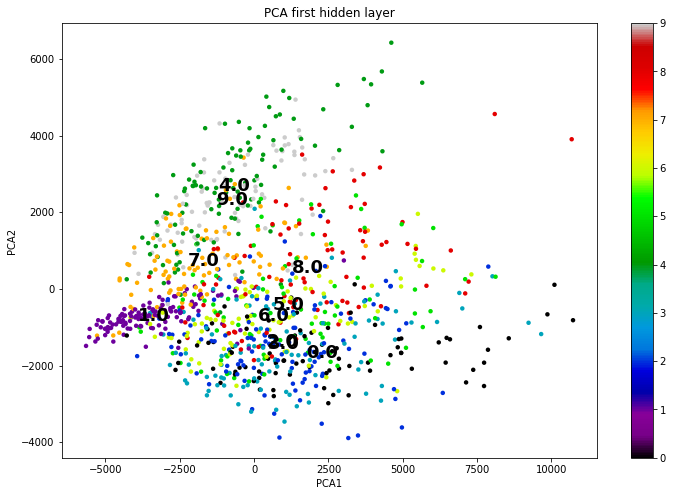

In [129]:
pca = PCA(n_components=2)
#pca.fit(x_train)
pca_train =pca.fit_transform(first_hidden_layer_output)
#pca_train = pca.transform(first_hidden_layer_output )

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
  
plt.title("PCA first hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PCA1")
plt.ylabel("PCA2")

### After first hidden layer the results of TSNE seems much better but still there are overlapping points in (4,9) label

###### Second hidden layer

In [107]:
second_hidden_layer = Model(inputs=model.input,
                                 outputs=model.get_layer("activation_1").output)
second_hidden_layer_output = second_hidden_layer.predict(x_test_1000)

Text(0, 0.5, 'TSNE 2')

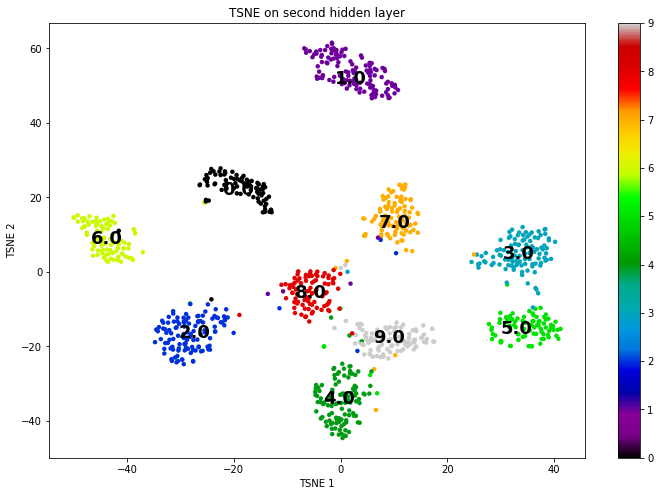

In [110]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(second_hidden_layer_output)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
  
plt.title("TSNE on second hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Text(0, 0.5, 'PCA2')

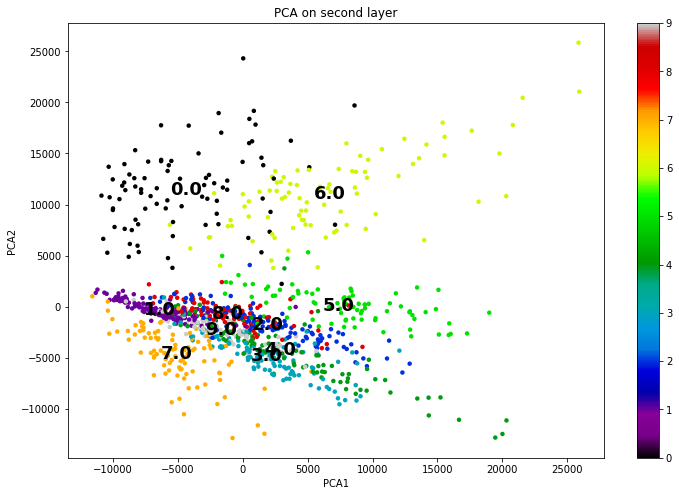

In [112]:
pca = PCA(n_components=2)
#pca.fit(x_train)
pca_train =pca.fit_transform(second_hidden_layer_output)

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')

plt.colorbar()
plt.clim(0,9)
plt.title("PCA on second layer")

plt.xlabel("PCA1")
plt.ylabel("PCA2")

### The output of second hidden layers after doing TSNE make the data completly seperable. Seeing the result of TSNE I can say that we did not required more than 2 hidden layer to solve this problem

###### Third hidden layer

In [114]:
third_hidden_layer = Model(inputs=model.input,
                                 outputs=model.get_layer("activation_2").output)

third_hidden_layer_output = third_hidden_layer.predict(x_test_1000)

Text(0, 0.5, 'TSNE 2')

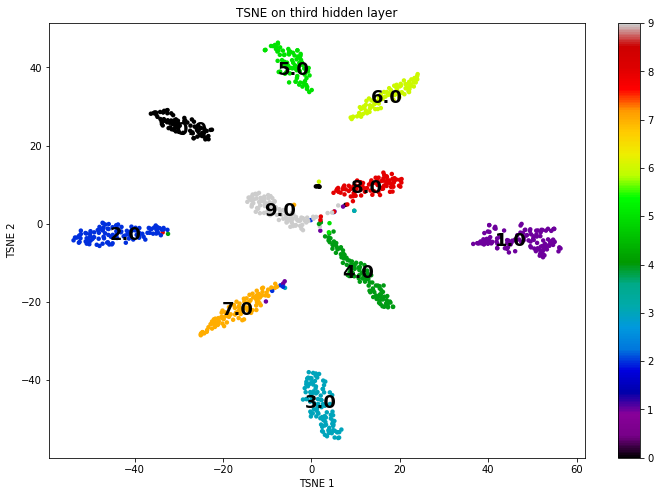

In [116]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(third_hidden_layer_output)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
  
plt.title("TSNE on third hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Text(0, 0.5, 'PCA2')

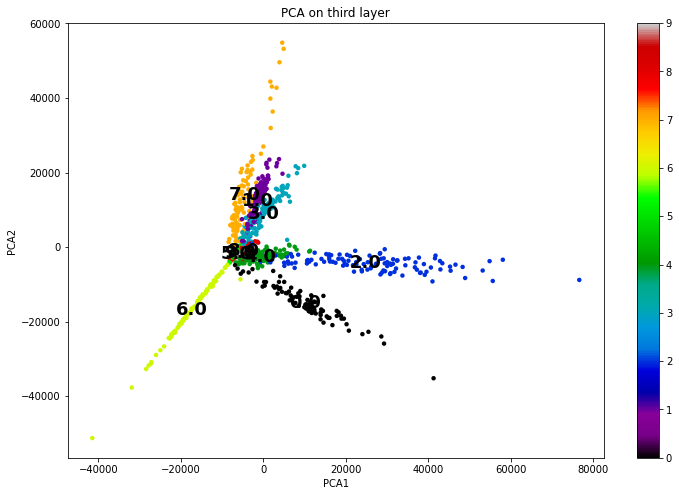

In [117]:
pca = PCA(n_components=2)
#pca.fit(x_train)
pca_train =pca.fit_transform(third_hidden_layer_output)

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')

plt.colorbar()
plt.clim(0,9)
plt.title("PCA on third layer")

plt.xlabel("PCA1")
plt.ylabel("PCA2")

##### Fourth Hidden layer

In [119]:
fourth_hidden_layer = Model(inputs=model.input,
                                 outputs=model.get_layer("activation_3").output)

fourth_hidden_layer_output = fourth_hidden_layer.predict(x_test_1000)

Text(0, 0.5, 'TSNE 2')

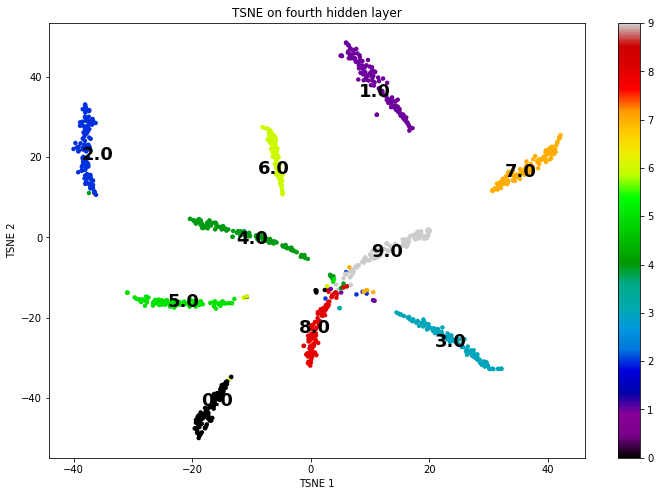

In [120]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(fourth_hidden_layer_output)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
  
plt.title("TSNE on fourth hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Text(0, 0.5, 'PCA2')

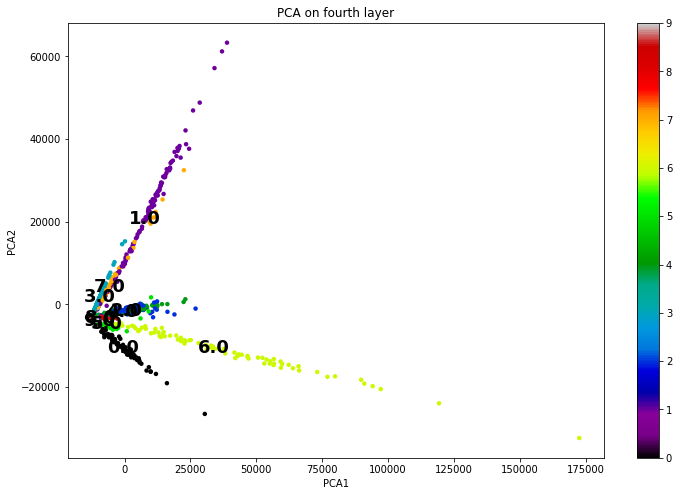

In [121]:
pca = PCA(n_components=2)
#pca.fit(x_train)
pca_train =pca.fit_transform(fourth_hidden_layer_output)

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')

plt.colorbar()
plt.clim(0,9)
plt.title("PCA on fourth layer")

plt.xlabel("PCA1")
plt.ylabel("PCA2")

###### Fifth hidden layer

In [122]:
fifth_hidden_layer = Model(inputs=model.input,
                                 outputs=model.get_layer("activation_3").output)

fifth_hidden_layer_output = fifth_hidden_layer.predict(x_test_1000)

Text(0, 0.5, 'TSNE 2')

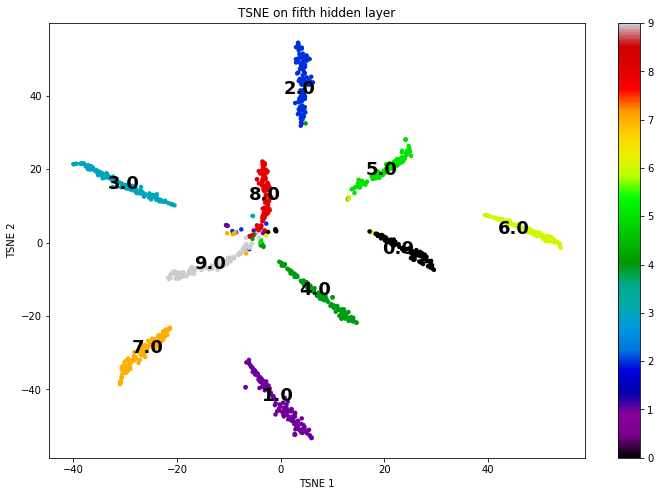

In [123]:
tsne = TSNE(n_components=2)
tsne_test = tsne.fit_transform(fifth_hidden_layer_output)

tsne_test_df = pd.DataFrame(tsne_test)
tsne_test_df.columns = ["tsne1","tsne2"]
tsne_test_df['labels'] = label

tsne_center = tsne_test_df.groupby("labels").agg({"tsne1":"mean","tsne2":"mean"}).reset_index()


plt.figure(figsize=(12,8))
plt.scatter(tsne_test_df['tsne1'],tsne_test_df['tsne2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = tsne_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')
  
plt.title("TSNE on fifth hidden layer")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")

Text(0, 0.5, 'PCA2')

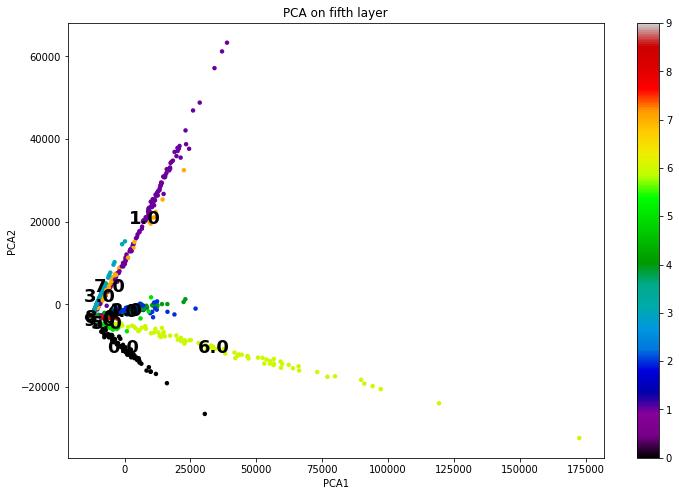

In [124]:
pca = PCA(n_components=2)
#pca.fit(x_train)
pca_train =pca.fit_transform(fifth_hidden_layer_output)

pca_test_df = pd.DataFrame(pca_train)
pca_test_df.columns = ["pca1","pca2"]
pca_test_df['labels'] = label

pca_center = pca_test_df.groupby("labels").agg({"pca1":"mean","pca2":"mean"}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(pca_test_df['pca1'],pca_test_df['pca2'], s=20, c = label, cmap = "nipy_spectral", edgecolor = "None")
center_vals = pca_center.values
for i in range(0,10):
  plt.annotate(str(center_vals[i,0]), 
                 (center_vals[i,1],center_vals[i,2]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=18, weight='bold',
                 color='k')

plt.colorbar()
plt.clim(0,9)
plt.title("PCA on fifth layer")

plt.xlabel("PCA1")
plt.ylabel("PCA2")

## Problem 2: Adult Optimization

Replicate the figures in M03 Adult Optimization, slide 33 and 34 using the details as follows:
1. Use the same network architecture and train five different network instances in five different setups. The architecture has to be a fully connected network (a regular network, not a CNN or RNN) with five hidden layers, 512 hidden units per layer.
2. Create five different networks that share the same architecture as follows:

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

11501568/11490434 [==============================] - 0s 0us/step


#### SGD optimizer

(a) Activation function: the logistic sigmoid function; initialization: random numbers gen-
erated from the normal distribution (μ = 0, σ = 0.01)

In [4]:

#define the keras model
history = History()

# initializer with normal distribution 
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.01)

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='sigmoid',kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))


In [5]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 6s 7ms/step - loss: 2.3036 - accuracy: 0.1081 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3035 - accuracy: 0.1077 - val_loss: 2.3021 - val_accuracy: 0.1009
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3036 - accuracy: 0.1070 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3035 - accuracy: 0.1076 - val_loss: 2.3032 - val_accuracy: 0.0980
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3037 - accuracy: 0.1084 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3035 - accuracy: 0.1078 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3039 - accuracy: 0.1044 - val_loss: 2.3048 - val_accuracy: 0.1028
Epoch 

In [9]:
sgd_sigmoid=history.history['val_accuracy']
len(sgd_sigmoid)

25

b) Activation function: the logistic sigmoid function; initialization: Xavier initializer

In [73]:
#define the keras model
history = History()

# Xaviers initializers
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='sigmoid',kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))


In [74]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [75]:
history = History()

In [76]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 2.3218 - accuracy: 0.1037 - val_loss: 2.3077 - val_accuracy: 0.1032
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3137 - accuracy: 0.1092 - val_loss: 2.3104 - val_accuracy: 0.1135
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 2.3040 - accuracy: 0.1185 - val_loss: 2.3251 - val_accuracy: 0.1028
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 2.2858 - accuracy: 0.1364 - val_loss: 2.2604 - val_accuracy: 0.1080
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 2.1671 - accuracy: 0.2504 - val_loss: 1.9242 - val_accuracy: 0.3309
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 1.4641 - accuracy: 0.4821 - val_loss: 1.1160 - val_accuracy: 0.6431
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.9228 - accuracy: 0.7244 - val_loss: 0.7601 - val_accuracy: 0.7914
Epoch 

In [77]:
sgd_sigmoid_xavier=history.history['val_accuracy']
len(sgd_sigmoid_xavier)

25

(c) Activation function: ReLU; initialization: random numbers generated from the normal distribution (μ = 0, σ = 0.01)

In [25]:
history = History()

In [26]:
normal_initer = tf.random_normal_initializer(mean=0.0, stddev=0.01, seed=40)

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(10, activation='softmax', kernel_initializer=normal_initer))


In [27]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 2.2280 - accuracy: 0.2465 - val_loss: 1.4066 - val_accuracy: 0.5562
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.6811 - accuracy: 0.7796 - val_loss: 0.3716 - val_accuracy: 0.8885
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2706 - accuracy: 0.9203 - val_loss: 0.2163 - val_accuracy: 0.9346
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1632 - accuracy: 0.9511 - val_loss: 0.1411 - val_accuracy: 0.9575
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1179 - accuracy: 0.9651 - val_loss: 0.1134 - val_accuracy: 0.9644
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0921 - accuracy: 0.9732 - val_loss: 0.0993 - val_accuracy: 0.9710
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0731 - accuracy: 0.9785 - val_loss: 0.0956 - val_accuracy: 0.9714
Epoch 

In [29]:
sgd_relu_normal=history.history['val_accuracy']
len(sgd_relu_normal)

25

d) Activation function: ReLU; initialization: Xavier initializer

In [57]:
history = History()

In [58]:
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))


In [59]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 6ms/step - loss: 1.1495 - accuracy: 0.8334 - val_loss: 0.3461 - val_accuracy: 0.9076
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2609 - accuracy: 0.9265 - val_loss: 0.2694 - val_accuracy: 0.9248
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1701 - accuracy: 0.9499 - val_loss: 0.2366 - val_accuracy: 0.9347
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1225 - accuracy: 0.9639 - val_loss: 0.2107 - val_accuracy: 0.9407
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0916 - accuracy: 0.9737 - val_loss: 0.2001 - val_accuracy: 0.9455
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0705 - accuracy: 0.9806 - val_loss: 0.1927 - val_accuracy: 0.9457
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0549 - accuracy: 0.9862 - val_loss: 0.1915 - val_accuracy: 0.9486
Epoch 

In [61]:
sgd_relu_xavier=history.history['val_accuracy']
len(sgd_relu_xavier)

25


(e) Activation function: ReLU; initialization: Kaiming He’s initializer

In [48]:
history = History()

In [49]:
# He initializer

He_initializer = tf.keras.initializers.HeNormal()
model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=He_initializer))


In [50]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 8.0096 - accuracy: 0.7766 - val_loss: 0.5326 - val_accuracy: 0.8742
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4134 - accuracy: 0.8953 - val_loss: 0.4020 - val_accuracy: 0.9033
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2714 - accuracy: 0.9249 - val_loss: 0.3490 - val_accuracy: 0.9122
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2023 - accuracy: 0.9427 - val_loss: 0.3230 - val_accuracy: 0.9191
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1575 - accuracy: 0.9549 - val_loss: 0.3159 - val_accuracy: 0.9208
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1276 - accuracy: 0.9640 - val_loss: 0.3045 - val_accuracy: 0.9247
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1052 - accuracy: 0.9708 - val_loss: 0.3063 - val_accuracy: 0.9238
Epoch 

In [52]:
sgd_relu_he=history.history['val_accuracy']
len(sgd_relu_he)

25

In [78]:
epochs = [i for i in range(1,26)]

sgd_loss_accuracy_q2 = pd.DataFrame(list(zip(epochs,sgd_sigmoid, sgd_sigmoid_xavier,sgd_relu_normal,sgd_relu_xavier,sgd_relu_he)),
               columns =['epochs','sgd_sigmoid', 'sgd_sigmoid_xavier', 'sgd_relu_normal','sgd_relu_xavier','sgd_relu_he'])

In [79]:
sgd_loss_accuracy_q2.to_csv("/content/drive/MyDrive/Deep Learning Assignment/sgd_loss_accuracy_q2.csv")

#### Plotting SGD graph for each points

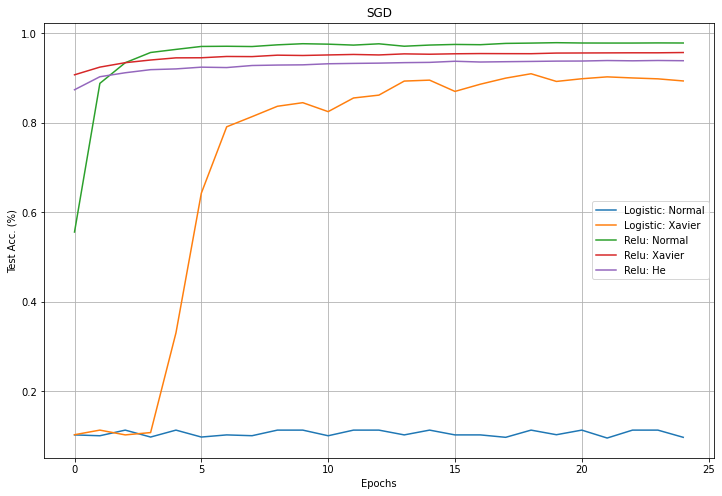

In [80]:
plt.figure(figsize=(12,8))
plt.plot(sgd_loss_accuracy_q2['sgd_sigmoid'],label='Logistic: Normal')
plt.plot(sgd_loss_accuracy_q2['sgd_sigmoid_xavier'],label='Logistic: Xavier')
plt.plot(sgd_loss_accuracy_q2['sgd_relu_normal'],label='Relu: Normal')
plt.plot(sgd_loss_accuracy_q2['sgd_relu_xavier'],label='Relu: Xavier')
plt.plot(sgd_loss_accuracy_q2['sgd_relu_he'],label='Relu: He')
plt.ylim()
plt.xlabel('Epochs')
plt.ylabel('Test Acc. (%)')
plt.title('SGD')
plt.legend()
plt.grid()

#### Adam Optimizer

(a) Activation function: the logistic sigmoid function; initialization: random numbers gen-
erated from the normal distribution (μ = 0, σ = 0.01)

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:

#define the keras model

history = History()

model = Sequential()
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.01)
model.add(Dense(512, input_dim = 784, activation='sigmoid',kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 6s 7ms/step - loss: 1.6239 - accuracy: 0.3610 - val_loss: 1.2572 - val_accuracy: 0.5319
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 1.1903 - accuracy: 0.5474 - val_loss: 1.0725 - val_accuracy: 0.6069
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.9364 - accuracy: 0.6640 - val_loss: 0.7000 - val_accuracy: 0.7589
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5926 - accuracy: 0.8091 - val_loss: 0.4834 - val_accuracy: 0.8501
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4485 - accuracy: 0.8633 - val_loss: 0.3818 - val_accuracy: 0.8883
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3947 - accuracy: 0.8811 - val_loss: 0.3817 - val_accuracy: 0.8878
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3441 - accuracy: 0.8993 - val_loss: 0.3070 - val_accuracy: 0.9120
Epoch 

In [ ]:
adam_sigmoid=history.history['val_accuracy']
len(adam_sigmoid)

25

(b) Activation function: the logistic sigmoid function; initialization: Xavier initializer

In [ ]:
# define the keras model

history = History()

# xaviers initializer
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='sigmoid',kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 0.6904 - accuracy: 0.7702 - val_loss: 0.3179 - val_accuracy: 0.9006
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3106 - accuracy: 0.9036 - val_loss: 0.2823 - val_accuracy: 0.9104
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2738 - accuracy: 0.9146 - val_loss: 0.2854 - val_accuracy: 0.9120
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2526 - accuracy: 0.9204 - val_loss: 0.2772 - val_accuracy: 0.9132
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2246 - accuracy: 0.9301 - val_loss: 0.2182 - val_accuracy: 0.9320
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2173 - accuracy: 0.9319 - val_loss: 0.2023 - val_accuracy: 0.9372
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2034 - accuracy: 0.9353 - val_loss: 0.2168 - val_accuracy: 0.9342
Epoch 

In [21]:
adam_sigmoid_xavier=history.history['val_accuracy']
len(adam_sigmoid_xavier)

25

(c) Activation function: ReLU; initialization: random numbers generated from the normal distribution (μ = 0, σ = 0.01)

In [ ]:
history = History()

normal_initer = tf.random_normal_initializer(mean=0.0, stddev=0.01, seed=40)

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(512, activation='relu', kernel_initializer=normal_initer))
model.add(Dense(10, activation='softmax', kernel_initializer=normal_initer))


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 0.2996 - accuracy: 0.9105 - val_loss: 0.1581 - val_accuracy: 0.9579
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1324 - accuracy: 0.9654 - val_loss: 0.1282 - val_accuracy: 0.9665
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0988 - accuracy: 0.9740 - val_loss: 0.1363 - val_accuracy: 0.9652
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0803 - accuracy: 0.9789 - val_loss: 0.1052 - val_accuracy: 0.9727
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0689 - accuracy: 0.9827 - val_loss: 0.1301 - val_accuracy: 0.9716
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0590 - accuracy: 0.9850 - val_loss: 0.1003 - val_accuracy: 0.9773
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0515 - accuracy: 0.9866 - val_loss: 0.0858 - val_accuracy: 0.9786
Epoch 

In [ ]:
adam_relu_normal=history.history['val_accuracy']


(d) Activation function: ReLU; initialization: Xavier initializer

In [ ]:
history = History()

# xavier initializer
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=glorat_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 1.0088 - accuracy: 0.8992 - val_loss: 0.1465 - val_accuracy: 0.9543
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1261 - accuracy: 0.9626 - val_loss: 0.1263 - val_accuracy: 0.9633
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0922 - accuracy: 0.9715 - val_loss: 0.1102 - val_accuracy: 0.9689
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 0.1140 - val_accuracy: 0.9660
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0749 - accuracy: 0.9778 - val_loss: 0.1306 - val_accuracy: 0.9680
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0615 - accuracy: 0.9817 - val_loss: 0.1458 - val_accuracy: 0.9648
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.1023 - val_accuracy: 0.9721
Epoch 

In [ ]:
adam_relu_xavier=history.history['val_accuracy']

(e) Activation function: ReLU; initialization: Kaiming He’s initializer

In [ ]:
history = History()

# he initializer
He_initializer = tf.keras.initializers.HeNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu',kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(512, activation='relu', kernel_initializer=He_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=He_initializer))


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=25,callbacks=[history], batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 3.6917 - accuracy: 0.8736 - val_loss: 0.3460 - val_accuracy: 0.9289
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.2250 - accuracy: 0.9469 - val_loss: 0.2191 - val_accuracy: 0.9452
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1382 - accuracy: 0.9633 - val_loss: 0.2026 - val_accuracy: 0.9542
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - accuracy: 0.9705 - val_loss: 0.2227 - val_accuracy: 0.9519
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1105 - accuracy: 0.9704 - val_loss: 0.1981 - val_accuracy: 0.9537
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0917 - accuracy: 0.9745 - val_loss: 0.1601 - val_accuracy: 0.9613
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0849 - accuracy: 0.9759 - val_loss: 0.1803 - val_accuracy: 0.9582
Epoch 

In [ ]:
adam_relu_he=history.history['val_accuracy']

In [ ]:
epochs = [i for i in range(1,26)]

adam_loss_accuracy_q2 = pd.DataFrame(list(zip(epochs,adam_sigmoid, adam_sigmoid_xavier,adam_relu_normal,adam_relu_xavier,adam_relu_he)),
               columns =['epochs','adam_sigmoid', 'adam_sigmoid_xavier', 'adam_relu_normal','adam_relu_xavier','adam_relu_he'])

In [ ]:
adam_loss_accuracy_q2.to_csv("/content/drive/MyDrive/Deep Learning Assignment/adam_loss_accuracy_q2.csv")

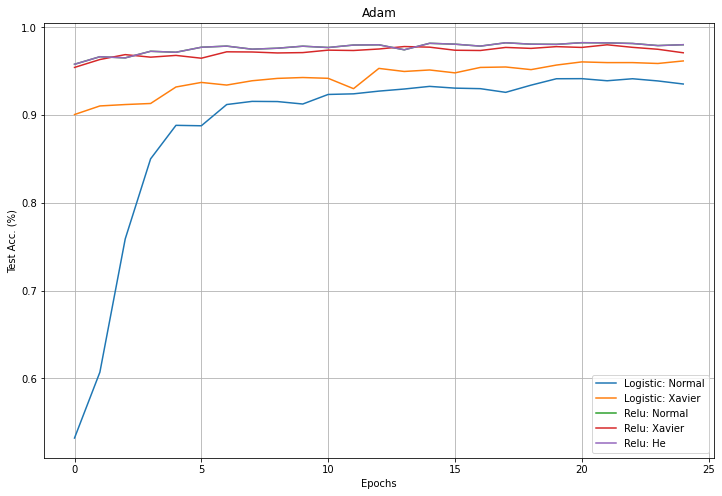

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(adam_loss_accuracy_q2['adam_sigmoid'],label='Logistic: Normal')
plt.plot(adam_loss_accuracy_q2['adam_sigmoid_xavier'],label='Logistic: Xavier')
plt.plot(adam_loss_accuracy_q2['adam_relu_normal'],label='Relu: Normal')
plt.plot(adam_loss_accuracy_q2['adam_relu_xavier'],label='Relu: Xavier')
plt.plot(adam_loss_accuracy_q2['adam_relu_he'],label='Relu: He')
plt.ylim()
plt.xlabel('Epochs')
plt.ylabel('Test Acc. (%)')
plt.title('Adam')
plt.legend()
plt.grid()

# Problem 3: Dropout

1. For this one you will train four network instances with the same network architecture. Let’s use a larger one this time, to maximize the effect of dropout: 1024×5. It has to be a fully connected network again (a regular network, not a CNN or RNN).
2. Create four different networks that share the same architecture as follows:
(a) Activation function: the logistic sigmoid function; initialization: Xavier initializer; no
dropout
(b) Activation function: the logistic sigmoid function; initialization: Xavier initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers
(c) Activation function: ReLU; initialization: Kaiming He’s initializer; no dropout
(d) Activation function: ReLU; initialization: Kaiming He’s initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers

In [ ]:
history = History()

In [ ]:
# Dowloading the data set

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

(a) Activation function: the logistic sigmoid function; initialization: Xavier initializer; no
dropout

In [ ]:
history = History()

In [ ]:
# xavier initializer
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____________________________________________

In [ ]:

model.compile(
    optimizer=Adam(learning_rate=0.0005),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300,callbacks=[history], batch_size=128)

Epoch 1/300
469/469 [==============================] - 4s 7ms/step - loss: 0.7815 - accuracy: 0.7462 - val_loss: 0.3175 - val_accuracy: 0.9077
Epoch 2/300
469/469 [==============================] - 3s 6ms/step - loss: 0.2856 - accuracy: 0.9154 - val_loss: 0.2395 - val_accuracy: 0.9288
Epoch 3/300
469/469 [==============================] - 3s 6ms/step - loss: 0.2285 - accuracy: 0.9309 - val_loss: 0.2166 - val_accuracy: 0.9337
Epoch 4/300
469/469 [==============================] - 3s 6ms/step - loss: 0.2034 - accuracy: 0.9384 - val_loss: 0.2068 - val_accuracy: 0.9362
Epoch 5/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1887 - accuracy: 0.9428 - val_loss: 0.1667 - val_accuracy: 0.9488
Epoch 6/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1751 - accuracy: 0.9461 - val_loss: 0.1809 - val_accuracy: 0.9436
Epoch 7/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1730 - accuracy: 0.9457 - val_loss: 0.1927 - val_accuracy: 0.9413

In [ ]:
# storing the loss
train_loss_no_dropout_sig = history.history['loss']
test_loss_no_dropout_sig = history.history['val_loss']

In [ ]:
actual_sigmoid_loss_without_dropout = pd.DataFrame(list(zip(epochs,train_loss_no_dropout_sig, test_loss_no_dropout_sig)),
               columns =['epochs','train_no_dropout', 'test_no_dropout'])

In [ ]:
actual_sigmoid_loss_without_dropout.to_csv("/content/drive/MyDrive/Deep Learning Assignment/actual_sigmoid_loss_without_dropout.csv")

(b) Activation function: the logistic sigmoid function; initialization: Xavier initializer; with dropout rate: 0.2 for the first layer and 0.5 for the other hidden layers


In [ ]:
history = History()

In [ ]:
#adding dropout layers

# xavier initalizer
glorat_initializer=tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Dense(512, input_dim = 784, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid', kernel_initializer=glorat_initializer))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer=glorat_initializer))

In [ ]:
#from keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300,callbacks=[history], batch_size=128)

Epoch 1/300
469/469 [==============================] - 4s 7ms/step - loss: 1.3117 - accuracy: 0.5304 - val_loss: 0.4798 - val_accuracy: 0.8581
Epoch 2/300
469/469 [==============================] - 3s 7ms/step - loss: 0.5242 - accuracy: 0.8439 - val_loss: 0.3207 - val_accuracy: 0.9091
Epoch 3/300
469/469 [==============================] - 3s 7ms/step - loss: 0.4045 - accuracy: 0.8826 - val_loss: 0.2634 - val_accuracy: 0.9251
Epoch 4/300
469/469 [==============================] - 3s 7ms/step - loss: 0.3504 - accuracy: 0.8974 - val_loss: 0.2443 - val_accuracy: 0.9305
Epoch 5/300
469/469 [==============================] - 3s 7ms/step - loss: 0.3216 - accuracy: 0.9062 - val_loss: 0.2276 - val_accuracy: 0.9339
Epoch 6/300
469/469 [==============================] - 3s 7ms/step - loss: 0.2940 - accuracy: 0.9141 - val_loss: 0.2075 - val_accuracy: 0.9408
Epoch 7/300
469/469 [==============================] - 3s 7ms/step - loss: 0.2739 - accuracy: 0.9201 - val_loss: 0.1995 - val_accuracy: 0.9413

In [ ]:
train_loss_dropout_sig = history.history['loss']
test_loss_dropout_sig = history.history['val_loss']

In [ ]:
actual_sigmoid_loss_with_dropout = pd.DataFrame(list(zip(epochs,train_loss_dropout_sig, test_loss_dropout_sig)),
               columns =['epochs','train_dropout', 'test_dropout'])

In [ ]:
actual_sigmoid_loss_with_dropout.to_csv("/content/drive/MyDrive/Deep Learning Assignment/actual_sigmoid_loss_with_dropout.csv")

In [187]:
actual_sigmoid_loss_with_dropout = pd.read_csv("/content/drive/MyDrive/Deep Learning Assignment/actual_sigmoid_loss_with_dropout.csv")
actual_sigmoid_loss_without_dropout = pd.read_csv("/content/drive/MyDrive/Deep Learning Assignment/actual_sigmoid_loss_without_dropout.csv")


#### Plotting 1024*5 Logistic

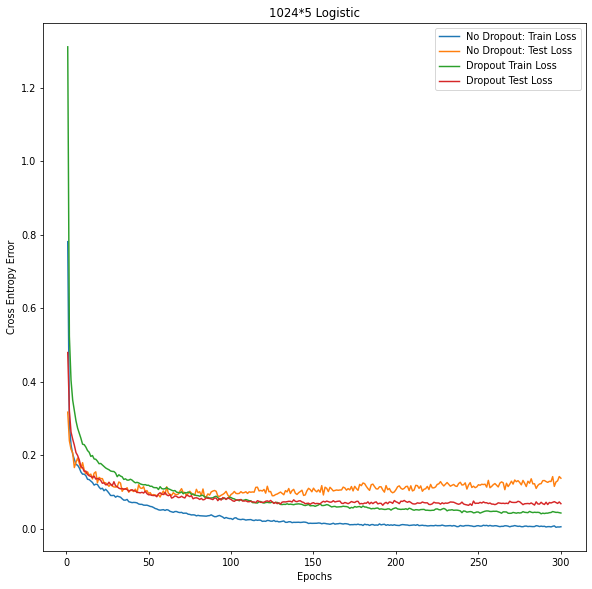

In [193]:
epochs = [i for i in range(301)]
plt.figure(figsize=(10, 10), dpi=70)
plt.plot(actual_sigmoid_loss_without_dropout['epochs'], actual_sigmoid_loss_without_dropout['train_no_dropout'], label = "No Dropout: Train Loss")
plt.plot(actual_sigmoid_loss_without_dropout['epochs'], actual_sigmoid_loss_without_dropout['test_no_dropout'], label = "No Dropout: Test Loss")
plt.plot(actual_sigmoid_loss_without_dropout['epochs'], actual_sigmoid_loss_with_dropout['train_dropout'], label = "Dropout Train Loss")
plt.plot(actual_sigmoid_loss_without_dropout['epochs'], actual_sigmoid_loss_with_dropout['test_dropout'] , label = "Dropout Test Loss")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.title('1024*5 Logistic')
plt.legend()
plt.show()

(c) Activation function: ReLU; initialization: Kaiming He’s initializer; no dropout

In [160]:
history = History()

In [161]:
# no dropout
# he initializer
initializer = tf.keras.initializers.HeNormal()
model = Sequential()
model.add(Dense(1024, input_dim = 784, activation='relu', kernel_initializer=initializer))
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dense(1024, activation='relu', kernel_initializer=initializer))
model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

In [162]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [163]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300,callbacks=[history], batch_size=128)

Epoch 1/300
469/469 [==============================] - 5s 10ms/step - loss: 4.5750 - accuracy: 0.8898 - val_loss: 1.5559 - val_accuracy: 0.9347
Epoch 2/300
469/469 [==============================] - 4s 9ms/step - loss: 0.8009 - accuracy: 0.9556 - val_loss: 0.9740 - val_accuracy: 0.9531
Epoch 3/300
469/469 [==============================] - 4s 9ms/step - loss: 0.3516 - accuracy: 0.9738 - val_loss: 0.9059 - val_accuracy: 0.9529
Epoch 4/300
469/469 [==============================] - 4s 8ms/step - loss: 0.2301 - accuracy: 0.9790 - val_loss: 0.8857 - val_accuracy: 0.9561
Epoch 5/300
469/469 [==============================] - 4s 9ms/step - loss: 0.2175 - accuracy: 0.9815 - val_loss: 0.8493 - val_accuracy: 0.9582
Epoch 6/300
469/469 [==============================] - 4s 9ms/step - loss: 0.1839 - accuracy: 0.9840 - val_loss: 0.6688 - val_accuracy: 0.9646
Epoch 7/300
469/469 [==============================] - 4s 8ms/step - loss: 0.1719 - accuracy: 0.9844 - val_loss: 0.6881 - val_accuracy: 0.962

In [172]:
train_loss_no_dropout = history.history['loss']
test_loss_no_dropout = history.history['val_loss']

In [166]:

relu_loss_q3 = pd.DataFrame(list(zip(train_loss_no_dropout, test_loss_no_dropout)),
               columns =['train_loss_no_dropout','test_loss_no_dropout'])

In [167]:
relu_loss_q3.to_csv("/content/drive/MyDrive/Deep Learning Assignment/relu_loss_without_dropout_q3.csv")

(d) Activation function: ReLU; initialization: Kaiming He’s initializer; with dropout rate:
0.2 for the first layer and 0.5 for the other hidden layers

In [170]:
history = History()

In [168]:

#define the keras model

model = Sequential()
he_initializer = tf.keras.initializers.HeNormal()
model.add(Dense(1024, input_dim = 784, activation='relu', kernel_initializer=he_initializer))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_initializer=he_initializer))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_initializer=he_initializer))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_initializer=he_initializer))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_initializer=he_initializer))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer=he_initializer))

In [169]:
#from keras.optimizers import Adam
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [171]:
# fit the keras model on the dataset
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300,callbacks=[history], batch_size=128)

Epoch 1/300
469/469 [==============================] - 6s 10ms/step - loss: 117.9797 - accuracy: 0.2406 - val_loss: 1.8569 - val_accuracy: 0.7300
Epoch 2/300
469/469 [==============================] - 4s 9ms/step - loss: 20.4259 - accuracy: 0.3942 - val_loss: 1.0064 - val_accuracy: 0.7602
Epoch 3/300
469/469 [==============================] - 4s 9ms/step - loss: 9.3942 - accuracy: 0.4559 - val_loss: 0.8048 - val_accuracy: 0.7672
Epoch 4/300
469/469 [==============================] - 4s 9ms/step - loss: 4.9303 - accuracy: 0.4659 - val_loss: 1.0509 - val_accuracy: 0.7458
Epoch 5/300
469/469 [==============================] - 4s 9ms/step - loss: 2.8705 - accuracy: 0.4673 - val_loss: 1.2610 - val_accuracy: 0.6703
Epoch 6/300
469/469 [==============================] - 4s 9ms/step - loss: 2.1060 - accuracy: 0.4817 - val_loss: 1.2508 - val_accuracy: 0.6522
Epoch 7/300
469/469 [==============================] - 4s 9ms/step - loss: 1.7853 - accuracy: 0.5139 - val_loss: 1.1729 - val_accuracy: 0.

In [174]:
train_loss_dropout = history.history['loss']
test_loss_dropout = history.history['val_loss']

In [179]:
# converting to data frame
relu_loss_dropout_q3 = pd.DataFrame(list(zip(train_loss_dropout, test_loss_dropout)),
               columns =['train_loss_dropout','test_loss_dropout'])

In [181]:
relu_loss_dropout_q3.to_csv("/content/drive/MyDrive/Deep Learning Assignment/relu_loss_with_dropout_q3.csv")

In [196]:
relu_loss_data = pd.read_csv("/content/drive/MyDrive/Deep Learning Assignment/relu_loss_data.csv")

#### Ploting 1024*5 ReLU

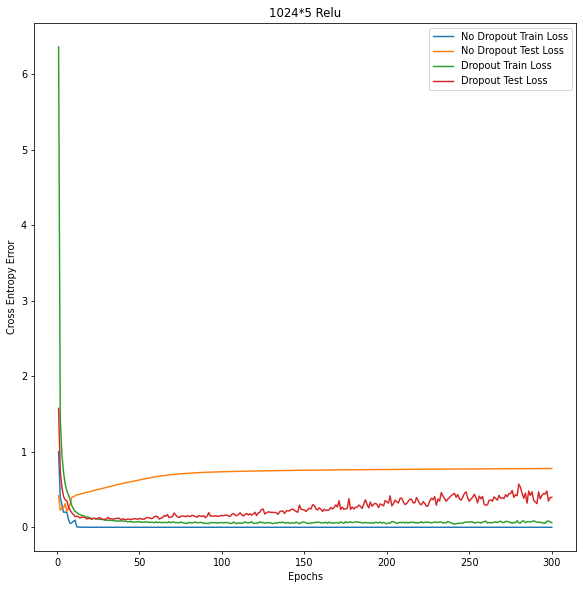

In [206]:
epochs = [i for i in range(1,301)]
plt.figure(figsize=(10, 10), dpi=70)
plt.plot(relu_loss_data['epochs'], relu_loss_data['train_no_dropout'], label = "No Dropout Train Loss")
plt.plot(relu_loss_data['epochs'], relu_loss_data['test_no_dropout'], label = "No Dropout Test Loss")
plt.plot(relu_loss_data['epochs'], relu_loss_data['train_dropout'], label = "Dropout Train Loss")
plt.plot(relu_loss_data['epochs'], relu_loss_data['test_dropout'] , label = "Dropout Test Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Error')
plt.title('1024*5 Relu')
plt.show()